In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

from sklearn.metrics import mean_squared_error

### data import

In [2]:
df = pd.read_csv("./data/USD_KRW.csv") 
df.columns=['ds','y']
print(df.shape)
df=df.set_index('ds')
df.head()

(2494, 2)


,y
ds,
2010-01-04,1161.0
2010-01-05,1147.3
2010-01-06,1141.4
2010-01-07,1132.0
2010-01-08,1134.1


### train, test set 나누기

In [3]:
#2019년 1월~2019년12월 train set/ 2020년 1월 test set
df_train=df.loc['2019-01-01': '2019-12-31' ,: ]
df_test=df.loc['2020-01-01':,:]

In [4]:
df_train=df_train.reset_index()
df_test=df_test.reset_index()

In [5]:
df_train.shape, df_test.shape

((247, 2), (20, 2))

In [6]:
df_train.head()

,ds,y
0,2019-01-02,1118.1
1,2019-01-03,1119.0
2,2019-01-04,1127.5
3,2019-01-07,1125.2
4,2019-01-08,1118.0


In [7]:
df_test.head()

,ds,y
0,2020-01-02,1157.8
1,2020-01-03,1156.9
2,2020-01-06,1162.7
3,2020-01-07,1169.6
4,2020-01-08,1165.3


### 그림으로 표현

##### 1. train data

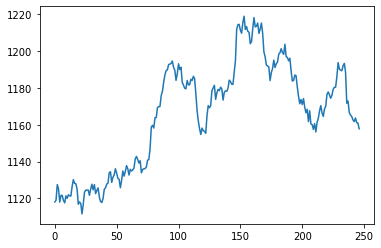

In [8]:
plt.plot(df_train['y'])

##### 2. test data

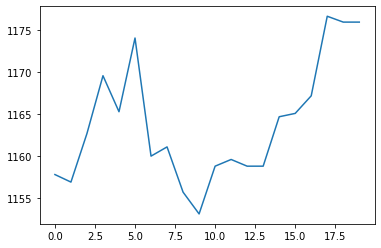

In [9]:
plt.plot(df_test['y'])

### facebook prophet 모델 구현 하기

#### 1. 예측값의 상한과 하한을 제어

In [10]:
df_train['cap'] = 1250
df_train['floor'] = 1000

#### 2. 객체 생성하고 Fit

In [11]:
# holiday이지만 주말과 공휴일을 다 삭제 
holiday = pd.DataFrame({
    'holiday': 'holiday',
    'ds': pd.to_datetime(
        ['2019-01-01','2019-01-05','2019-01-06','2019-01-12','2019-01-13','2019-01-19','2019-01-20','2019-01-26',
           '2019-01-27','2019-02-02','2019-02-03','2019-02-04','2019-02-05','2019-02-06','2019-02-09','2019-02-10',
           '2019-02-16','2019-02-17','2019-02-23','2019-02-24','2019-03-01','2019-03-02','2019-03-03','2019-03-09',
           '2019-03-10','2019-03-16','2019-03-17','2019-03-23','2019-03-24','2019-03-30','2019-03-31','2019-04-06',
           '2019-04-07','2019-04-13','2019-04-14','2019-04-20','2019-04-21','2019-04-27','2019-04-28','2019-05-04',
           '2019-05-05','2019-05-06','2019-05-11','2019-05-12','2019-05-18','2019-05-19','2019-05-25','2019-05-26',
           '2019-06-01','2019-06-02','2019-06-06','2019-06-08','2019-06-09','2019-06-15','2019-06-16','2019-06-22',
           '2019-06-23','2019-06-29','2019-06-30','2019-07-06','2019-07-07','2019-07-13','2019-07-14','2019-07-20',
           '2019-07-21','2019-07-27','2019-07-28','2019-08-03','2019-08-04','2019-08-10','2019-08-11','2019-08-15',
           '2019-08-17','2019-08-18','2019-08-24','2019-08-25','2019-08-31','2019-09-01','2019-09-07','2019-09-08',
           '2019-09-12','2019-09-13','2019-09-14','2019-09-15','2019-09-21','2019-09-22','2019-09-28','2019-09-29',
           '2019-10-03','2019-10-05','2019-10-06','2019-10-09','2019-10-12','2019-10-13','2019-10-19','2019-10-20',
           '2019-10-26','2019-10-27','2019-11-02','2019-11-03','2019-11-09','2019-11-10','2019-11-16','2019-11-17',
           '2019-11-23','2019-11-24','2019-11-30','2019-12-01','2019-12-07','2019-12-08','2019-12-14','2019-12-15',
           '2019-12-21','2019-12-22','2019-12-25','2019-12-28','2019-12-29',]),
    'lower_window': 0,
    'upper_window': 0,
    })

In [12]:
m = Prophet(growth='logistic', holidays=holiday) # 여기서 파라미터 추가, 삭제
m.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### 3. 미래 Dataframe 생성

In [13]:
future = m.make_future_dataframe(periods=31)
print(future.shape)
future.head()

(278, 1)


,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08


In [14]:
future=future.set_index('ds')

In [15]:
future_train=future.loc['2019-01-01': '2019-12-31' ,: ]
future_test=future.loc['2020-01-01':,:]


future_train=future_train.reset_index()
future_test=future_test.reset_index()

In [16]:
print(future_train.shape)
future_train.head()

(247, 1)


,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08


In [17]:
print(future_test.shape)
future_test.head()

(31, 1)


,ds
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


In [18]:
from datetime import datetime, timedelta

start_date = datetime.strptime('2020-01-01', '%Y-%m-%d') #시작 날짜
end_date = datetime.strptime('2020-02-01', '%Y-%m-%d') #끝 날짜

test_total_date = [] 

while start_date.strftime('%Y-%m-%d') != end_date.strftime('%Y-%m-%d'):
    test_total_date.append(start_date.strftime('%Y-%m-%d')) 
    start_date += timedelta(days=1)
    

test_holiday_date=['2020-01-01','2020-01-04','2020-01-05','2020-01-11','2020-01-12','2020-01-18','2020-01-19','2020-01-24',
           '2020-01-25','2020-01-26','2020-01-27']    #마찬가지로 주말, 공휴일 제거

In [19]:
final_date = list(set(test_total_date) - set(test_holiday_date))
future_test=future_test[future_test['ds'].isin(final_date)]
future=pd.concat([future_train,future_test],ignore_index=True)

In [20]:
len(final_date)

20

In [21]:
future.tail()

,ds
262,2020-01-23
263,2020-01-28
264,2020-01-29
265,2020-01-30
266,2020-01-31


In [22]:
future.head()

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08


In [23]:
future['cap'] = 1250
future['floor'] = 1000

### 예측하기

In [ ]:
forecast = m.predict(future)  
print(forecast.shape)
forecast.tail()

In [ ]:
forecast.iloc[-19:, :].yhat.plot()

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

##### -그림으로 표현 

In [ ]:
#월래의 시계열 데이터와 예측 데이터
fig1 = m.plot(forecast)

In [ ]:
#선형 회귀 및 계절성 성분별로 분리
fig2 = m.plot_components(forecast)

### 정확도 측정

In [ ]:
predicted_train=forecast[:-19]['yhat'].reset_index()
y_train=df_train['y'].reset_index()

In [ ]:
plt.plot(predicted_train['yhat'], label='pred')
plt.plot(y_train['y'],label='actual')
plt.legend()
plt.show()